In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import mahalanobis as mahal

# cmaps: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
# 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci,(x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    p = True
    x = np.linspace(-6,6,nx)
    y = np.linspace(-6,6,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j],Y[i,j]])
            '''if p:
                print(xvec)
                print("AAA")
                print(gauss2D(xvec,m,C))
                p = False'''
            Z[i,j] = gauss2D(xvec,m,C)
    return X,Y,Z

def posteriorPlot(nx,ny,m1,m2,P1,P2,C1,C2=None):
    if C2 is None:
        C2 = C1
    x = np.linspace(-5,5,nx)
    y = np.linspace(-5,5,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j],Y[i,j]])
            num = P1 * gauss2D(xvec,m1,C1)
            den = P1 * gauss2D(xvec,m1,C1) + P2 * gauss2D(xvec,m2,C2)

            Z[i,j] = num/den
    return X,Y,Z



[ 1.08333337 -0.66666669]


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


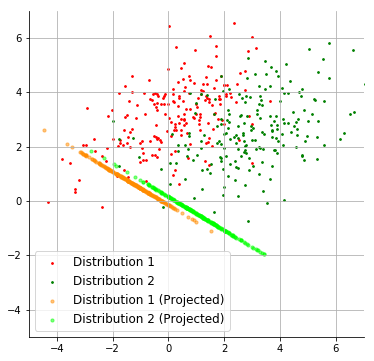

In [2]:
nx,ny=50,40

plt.figure(figsize=(6,6))


m1 = np.array([0,3])
m2 = np.array([3,2.5])
C = np.array([[2,1],[1,2]], np.float32)
C1 = C
C2 = C
#C1 = np.array([[2,0],[0,2]], np.float32)
#C2 = np.array([[1.5,0],[0,1.5]], np.float32)


X = np.random.randn(200,2) @ np.linalg.cholesky(C) + m1
Y = np.random.randn(200,2) @ np.linalg.cholesky(C) + m2
plt.scatter(X[:,0],X[:,1],s=3,c="r",label="Distribution 1")
plt.scatter(Y[:,0],Y[:,1],s=3,c="g",label="Distribution 2")

Xp, Yp, Zp  = twoDGaussianPlot(nx,ny,m1,C)
Xp2,Yp2,Zp2 = twoDGaussianPlot(nx,ny,m2,C)
#plt.contour(Xp, Yp, Zp,3, cmap = "inferno")
#plt.contour(Xp2,Yp2,Zp2,3, cmap = "viridis")
plt.grid(True)



# Fisher LDA direction
Ci = np.linalg.inv(C1+C2)
uF = Ci @ (m2-m1)
ls = np.linspace(-5,7)
#plt.plot(ls,ls*uF[1]/uF[0],label="Fisher discriminant direction")


ax = plt.subplot(111)
ax.set_xlim([-5,7])
ax.set_ylim([-5,7])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

uFsize=np.sqrt(uF[0]**2+uF[1]**2)
print(uF)
#yp1a=[i*uF[0]/uFsize for i in yp1]
#yp1b=[i*uF[1]/uFsize -0.25 for i in yp1]
#yp2a=[i*uF[0]/uFsize for i in yp2]
#yp2b=[i*uF[1]/uFsize for i in yp2]
#/(np.linalg.norm(i)*np.linalg.norm(uF))
yp1a=[np.dot(i,uF)*uF[0]/(np.linalg.norm(uF)**2) for i in X]
yp1b=[np.dot(i,uF)*uF[1]/(np.linalg.norm(uF)**2) -0.15 for i in X]
yp2a=[np.dot(i,uF)*uF[0]/(np.linalg.norm(uF)**2) for i in Y]
yp2b=[np.dot(i,uF)*uF[1]/(np.linalg.norm(uF)**2) +0.15 for i in Y]
plt.scatter(yp1a,yp1b,s=10,c="darkorange",alpha=0.5,label="Distribution 1 (Projected)")
plt.scatter(yp2a,yp2b,s=10,c="lime",alpha=0.5,label="Distribution 2 (Projected)")
plt.legend(loc='lower left',prop={'size': 12})

#plt.savefig("lda_projected.svg")


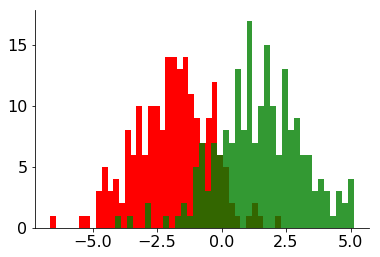

In [3]:
# Fisher discriminant direction (snippet 2)

Ci = np.linalg.inv(C1+C2)
uF = Ci @ (m2-m1)
yp1 = X @ uF
yp2 = Y @ uF

matplotlib.rcParams.update({"font.size":16})
plt.hist(yp1,bins=40,color="r",alpha=1)
plt.hist(yp2,bins=40,color="g",alpha=0.8)

ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.savefig("lda_histogram.svg")

[ 1.08333337 -0.66666669]
-6.659068615295736 2.2966974350919225
[0.17621282 0.50578395]
-9334.375
-4376.25


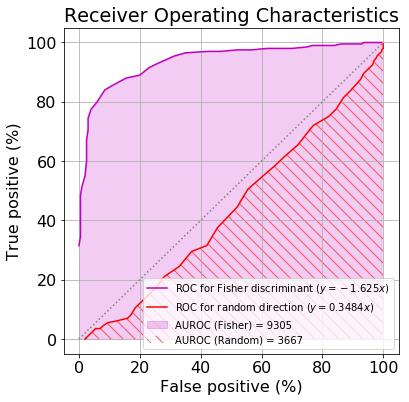

In [24]:
# ROC CURVE (snippet 3)
print(uF)

# Define range over which to slide a threshold
pmin = np.min( np.array((np.min(yp1),np.min(yp2))) )
pmax = np.min( np.array((np.max(yp1),np.max(yp2))) )
print(pmin,pmax)

# Set up an array of thresholds
nRocPoints = 50
thRange = np.linspace(pmin,pmax,nRocPoints)
ROC = np.zeros((nRocPoints,2))

# Compute tp and fp at each threshold
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp2[yp2>thresh]) * 100 / len(yp2)
    FP = len(yp1[yp1>thresh]) * 100 / len(yp1)
    ROC[i,:] = [TP,FP]
    
# Plot ROC curve
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1],ROC[:,0], c="m",label="ROC for Fisher discriminant " + r'($y=-1.625 x$)')
ax.plot(np.linspace(0,100),np.linspace(0,100),c="gray",linestyle=":")
ax.set_xlabel("False positive (%)")
ax.set_ylabel("True positive (%)")
ax.set_title("Receiver Operating Characteristics")
ax.grid(True)


# Area under ROC curve
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


# ________________________
##### FOR RANDOM DIRECTION
# ________________________
#randDir = np.random.uniform(-1,1,size=2) # [0.17621282 0.50578395]
# randDir = m1-m2 # Difference of means
print(randDir)
yp3 = X @ randDir
yp4 = Y @ randDir
pmin2 = np.min( np.array((np.min(yp3),np.min(yp4))) )
pmax2 = np.min( np.array((np.max(yp3),np.max(yp4))) )
thRange = np.linspace(pmin2,pmax2,nRocPoints)
ROC2 = np.zeros((nRocPoints,2))
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp3[yp3>thresh]) * 100 / len(yp3)
    FP = len(yp4[yp4>thresh]) * 100 / len(yp4)
    ROC2[i,:] = [TP,FP]
ax.plot(ROC2[:,1],ROC2[:,0], c="r",label="ROC for random direction " + r"($y=0.3484 x$)")
ax.fill_between(ROC[:,1],ROC[:,0],0,alpha=0.2,color="m",label="AUROC (Fisher) = 9305")
ax.fill_between(ROC2[:,1],0,ROC2[:,0],alpha=0.6,facecolor="none",
                edgecolor='r',hatch="\\\\",linewidth=0.0,
                label="AUROC (Random) = 3667")
plt.legend(loc='lower right',prop={'size': 10})

print( np.trapz(ROC[:,0],ROC[:,1]) )
print( np.trapz(ROC2[:,0],ROC2[:,1]) )

#plt.savefig("roc.svg")

[ 3.  -0.5]
-9129.625


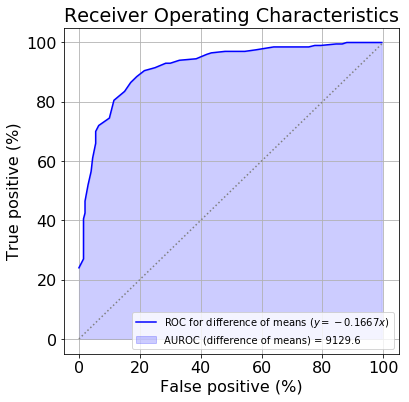

In [394]:
yp5 = X @ (m2-m1)
yp6 = Y @ (m2-m1)
print(m2-m1)
pmin3 = np.min( np.array((np.min(yp5),np.min(yp6))) )
pmax3 = np.min( np.array((np.max(yp5),np.max(yp6))) )
nRocPoints = 50
thRange = np.linspace(pmin3,pmax3,nRocPoints)
ROCm = np.zeros((nRocPoints,2))

# Compute tp and fp at each threshold
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp6[yp6>thresh]) * 100 / len(yp6)
    FP = len(yp5[yp5>thresh]) * 100 / len(yp5)
    ROCm[i,:] = [TP,FP]
    
# Plot ROC curve
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(ROCm[:,1],ROCm[:,0], c="b",label="ROC for difference of means " + r'($y=-0.1667 x$)')
ax.plot(np.linspace(0,100),np.linspace(0,100),c="gray",linestyle=":")
ax.set_xlabel("False positive (%)")
ax.set_ylabel("True positive (%)")
ax.set_title("Receiver Operating Characteristics")
ax.grid(True)


# Area under ROC curve
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

ax.fill_between(ROCm[:,1],ROCm[:,0],0,alpha=0.2,color="b",label="AUROC (difference of means) = 9129.6")
plt.legend(loc='lower right',prop={'size': 10})
print( np.trapz(ROCm[:,0],ROCm[:,1]) )
#plt.savefig("diffmeans.svg")

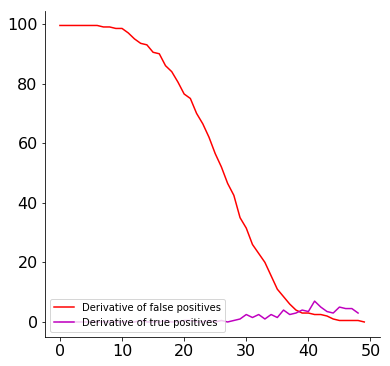

In [25]:
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(-np.diff(ROC[:,1]), c="r",label="Derivative of false positives")
ax.plot(-np.diff(ROC[:,0]), c="m",label="Derivative of true positives")
plt.legend(loc='lower left',prop={'size': 10})
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
#plt.savefig("roc_diff200000.svg")

0.019771484526032345 3.2491121157496528
-8748.5


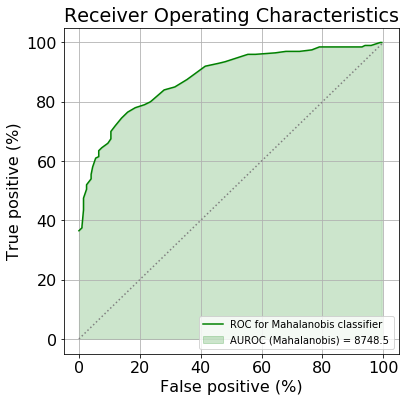

In [391]:
yp7 = np.array([mahal(i,m1,np.linalg.inv(C)) for i in X])
yp8 = np.array([mahal(i,m1,np.linalg.inv(C)) for i in Y])
#print(yp1)
#print("AA")
#print(yp7)
# Define range over which to slide a threshold
pmin = np.min( np.array((np.min(yp7),np.min(yp8))) )
pmax = np.min( np.array((np.max(yp7),np.max(yp8))) )
print(pmin,pmax)

# Set up an array of thresholds
nRocPoints = 50
thRange = np.linspace(pmin,pmax,nRocPoints)
ROC = np.zeros((nRocPoints,2))

# Compute tp and fp at each threshold
'''for i in range(len(thRange)):
    thresh = thRange[i]
    TP, FP = 0,0
    for i in range(len(X)):
        if mahal(X[i],m1,np.linalg.inv(C))>thresh:
            TP += 1
        if mahal(Y[i],m1,np.linalg.inv(C))>thresh:
            FP += 1
    TP = TP * 100 / len(X)
    FP = FP * 100 / len(Y)
    print([TP,FP])
    print("A")
    ROC[i,:] = [TP,FP]'''
for i in range(len(thRange)):
    thresh = thRange[i]
    TP = len(yp8[yp8>thresh]) * 100 / len(yp8)
    FP = len(yp7[yp7>thresh]) * 100 / len(yp7)
    ROC[i,:] = [TP,FP]
    
    
# Plot ROC curve
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1],ROC[:,0], c="g",label="ROC for Mahalanobis classifier")
ax.plot(np.linspace(0,100),np.linspace(0,100),c="gray",linestyle=":")
ax.set_xlabel("False positive (%)")
ax.set_ylabel("True positive (%)")
ax.set_title("Receiver Operating Characteristics")
ax.grid(True)


# Area under ROC curve
# https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
ax.fill_between(ROC[:,1],ROC[:,0],0,alpha=0.2,color="g",label="AUROC (Mahalanobis) = 8748.5")
plt.legend(loc='lower right',prop={'size': 10})

print( np.trapz(ROC[:,0],ROC[:,1]) )

#plt.savefig("roc_mahalanobis.svg")

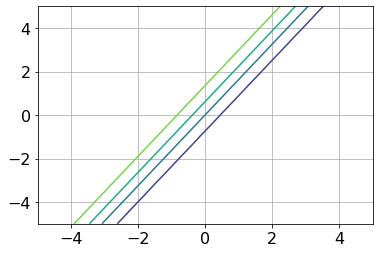

In [104]:
ax#posteriorPlot(nx,ny,m1,m2,X,Y,C)
Xp3,Yp3,Zp3 = posteriorPlot(nx,ny,m1,m2,0.5,0.5,C)
plt.contour(Xp3, Yp3, Zp3,5)
plt.grid(True)

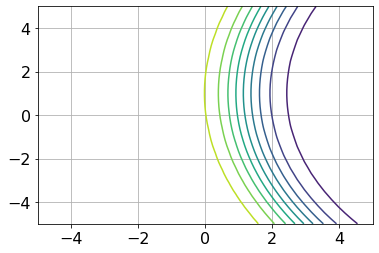

In [6]:
C1=np.array([[2,0],[0,2]], np.float32)
C2=np.array([[1.5,0],[0,1.5]], np.float32)
Xp3,Yp3,Zp3 = posteriorPlot(nx,ny,m1,m2,0.5,0.5, C1,C2)
plt.contour(Xp3, Yp3, Zp3,9)
plt.grid(True)